In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

def averager():
    """Calculate the average using a clojure."""
    count = 0
    total = 0.0

    def average(value):
        nonlocal count, total
        count += 1
        total += value
        return total / count

    return average


In [5]:
video = cv.VideoCapture(cv.samples.findFileOrKeep("example1.mp4"))
step = 1
r, g, b = None, None, None
r_avg, g_avg, b_avg = averager(),averager(), averager()
# Get the total frames to be used by the progress bar
total_frames = int(video.get(cv.CAP_PROP_FRAME_COUNT))
for count in tqdm(range(total_frames)):
    # Split the frame into its respective channels
    _, frame = video.read()

    if count % step == 0 and frame is not None:
        # Get the current RGB
        b_curr, g_curr, r_curr = cv.split(frame.astype("float"))
        r, g, b = r_avg(r_curr), g_avg(g_curr), b_avg(b_curr)

# Merge the RGB averages together and write the output image to disk
long_exposure = cv.merge([b, g, r]).astype("uint8")
long_exposure_path = 'long_exposure_path.jpg'
cv.imwrite(long_exposure_path, long_exposure)


100%|██████████| 653/653 [00:40<00:00, 15.99it/s]


True

In [2]:
video = cv.VideoCapture(cv.samples.findFileOrKeep("example1.mp4"))
while True:
    ret, frame = video.read()
    if frame is None:
        break
    else:
        last_frame = frame

last_frame_path = 'last_frame_path.jpg'
cv.imwrite(last_frame_path, last_frame)


True

In [3]:
last_frame = cv.imread(last_frame_path)

# apply grabcut to detect object and write to file
mask = np.zeros(last_frame.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (800, 600, 500, 450) # (startx, starty, offsetx, offsety)
(mask, bgdModel, fgdModel) = cv.grabCut(last_frame, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
grab_cut_processed = last_frame*mask[:,:,np.newaxis]
grab_cut_processed_path = 'grab_cut_processed_path.jpg'
cv.imwrite(grab_cut_processed_path, grab_cut_processed)

# apply threshold to generate mask and write to file
grab_cut_processed = cv.imread(grab_cut_processed_path, cv.IMREAD_GRAYSCALE)
ret, grab_cut_mask = cv.threshold(grab_cut_processed, 5, 255, cv.THRESH_BINARY)
grab_cut_mask_path = 'grab_cut_mask_path.jpg'
cv.imwrite(grab_cut_mask_path, grab_cut_mask)

True

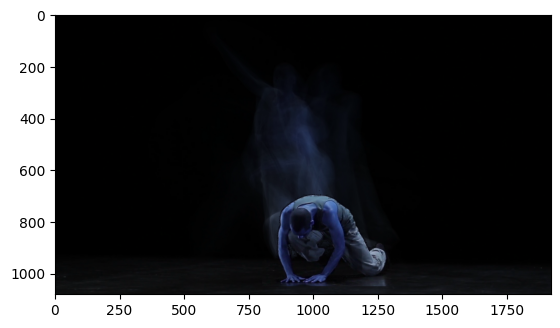

True

In [6]:
long_exposure = cv.imread(long_exposure_path)
last_frame = cv.imread(last_frame_path)
grab_cut_mask = cv.imread(grab_cut_mask_path)
freeze_me_image = long_exposure.copy()
freeze_me_image[np.where(grab_cut_mask == 255)] = last_frame[np.where(grab_cut_mask == 255)]
plt.imshow(freeze_me_image), plt.show()
freeze_me_path = 'freeze_me_path.jpg'
cv.imwrite(freeze_me_path, freeze_me_image)